In [238]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [239]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [240]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [241]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [242]:
df_airline.dropna(axis=0,inplace=True)

In [243]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [244]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [245]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [246]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [247]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [248]:
df_airline.set_index('Month',inplace=True)

In [249]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

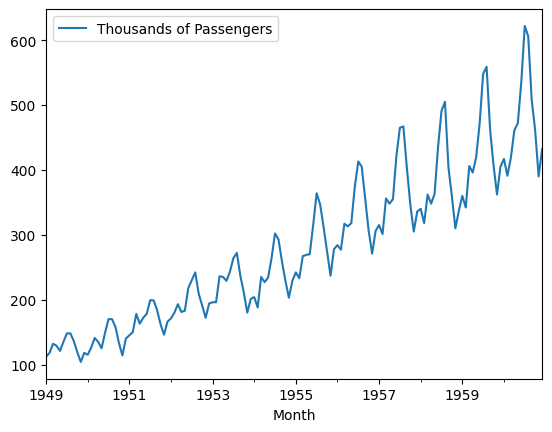

In [250]:
df_airline.plot()

In [251]:
from statsmodels.tsa.stattools import adfuller

In [252]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [253]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [254]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [255]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [256]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [257]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [258]:
### 12 months
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [259]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [260]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

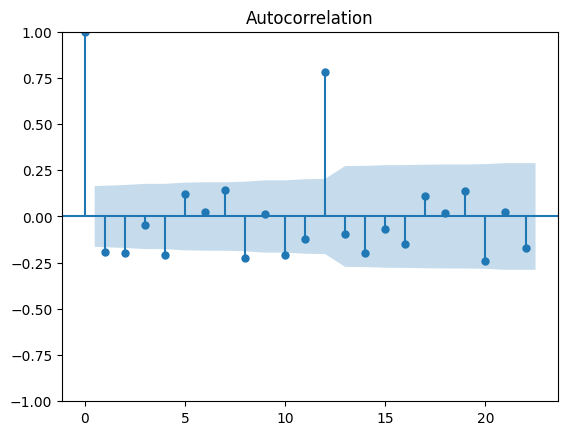

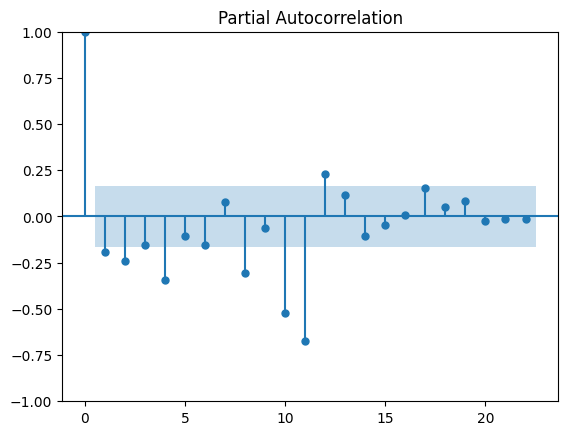

In [261]:
# result = plot_pacf(df_airline["Passengers Second Difference"].dropna())
acf2 = plot_acf(df_airline["Passengers Second Difference"].dropna())
pacf2 = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [262]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [263]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [264]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [265]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [266]:
from statsmodels.tsa.arima.model import ARIMA  # Use the correct path


In [267]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(12,2,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [268]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [269]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(12, 2, 12)   Log Likelihood                -306.223
Date:                     Fri, 26 Jan 2024   AIC                            662.445
Time:                             17:53:24   BIC                            722.613
Sample:                         01-01-1949   HQIC                           686.602
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.813     -0.405      0.685      -1.923       1.264
ar.L2         -0.5924      0.749     -0.791      0.429      -2.060       0.875
ar.L3         -0.3796      0.771     -0.492      0.622      -1.891       1.131
ar.L4         -0.5011      0.716     -0.700      0.484      -1.904       0.902
ar.L5         -0.4702      0.750     -0.627      0.531      -1.940       1.000
ar.L6         -0.3758      0.789     -0.476      0.634      -1.922       1.170
ar.L7         -0.5336      0.657     -0.812      0.417      -1.821       0.754
ar.L8         -0.4415      0.763     -0.579      0.563      -1.936       1.053
ar.L9         -0.5141      0.722     -0.712      0.477      -1.930       0.902
ar.L10        -0.4536      0.769     -0.590      0.555      -1.961       1.053
ar.L11        -0.3804      0.712     -0.534      0.593      -1.777       1.016
ar.L12         0.3539      0.659      0.537      0.591      -0.938       1.646
ma.L1         -0.8651      0.923     -0.937      0.349      -2.675       0.945
ma.L2          0.2990      1.093      0.274      0.784      -1.844       2.442
ma.L3         -0.4680      1.190     -0.393      0.694      -2.801       1.865
ma.L4          0.2880      1.283      0.224      0.822      -2.227       2.803
ma.L5         -0.0174      1.430     -0.012      0.990      -2.820       2.786
ma.L6         -0.2217      1.473     -0.151      0.880      -3.108       2.665
ma.L7          0.4035      1.289      0.313      0.754      -2.123       2.930
ma.L8         -0.5164      1.079     -0.479      0.632      -2.630       1.598
ma.L9          0.6574      0.816      0.805      0.421      -0.942       2.257
ma.L10        -0.5796      0.616     -0.940      0.347      -1.788       0.629
ma.L11         0.2752      0.486      0.566      0.571      -0.678       1.228
ma.L12        -0.1914      0.387     -0.495      0.621      -0.950       0.567
sigma2        77.0333     26.997      2.853      0.004      24.120     129.947
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.84   Prob(JB):                         0.36
Heteroskedasticity (H):               2.23   Skew:                             0.38
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [270]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [271]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

<Axes: ylabel='Density'>

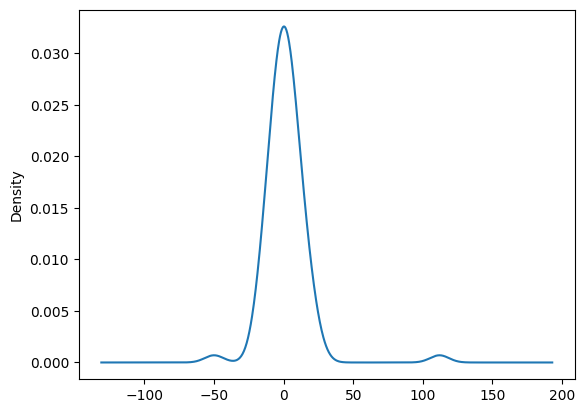

In [272]:
model_Arima_fit.resid.plot(kind='kde')

In [273]:
test_data['Predicted_ARIMA']=pred

<ipython-input-273-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

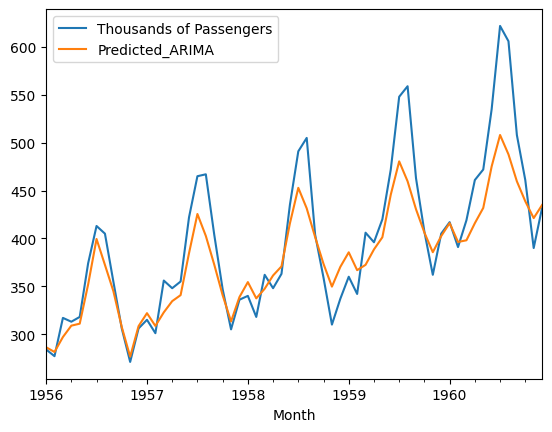

In [274]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

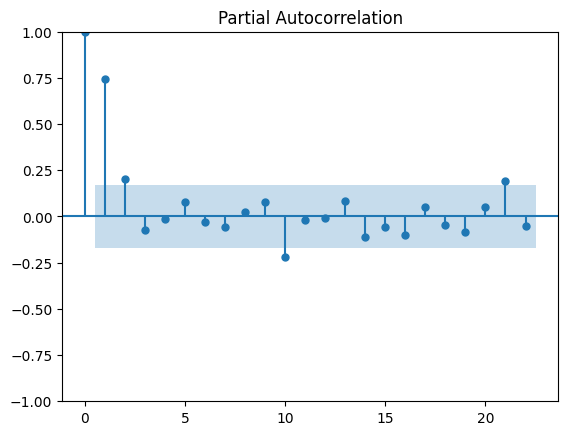

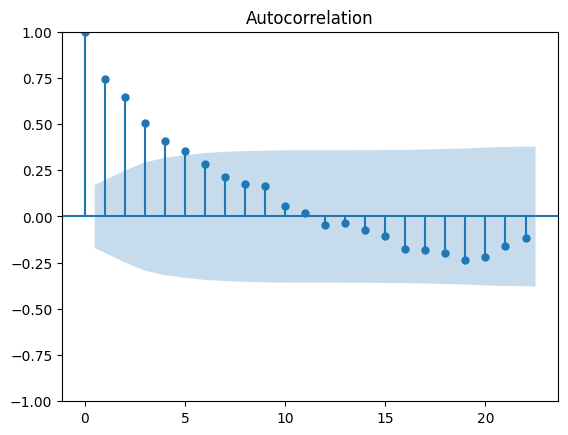

In [275]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())


# SARIMAX

In [276]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [404]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(10,2,5),seasonal_order=(10,2,5,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [405]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [406]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(10, 2, 5)x(10, 2, 5, 12)   Log Likelihood                -219.442
Date:                              Fri, 26 Jan 2024   AIC                            500.884
Time:                                      18:10:37   BIC                            564.758
Sample:                                  01-01-1949   HQIC                           525.764
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6978     12.899     -0.054      0.957     -25.980      24.585
ar.L2         -0.4668      5.327     -0.088      0.930     -10.907       9.973
ar.L3         -0.2129      6.519     -0.033      0.974     -12.990      12.564
ar.L4         -0.6863      8.399     -0.082      0.935     -17.147      15.775
ar.L5         -0.1821      4.338     -0.042      0.967      -8.684       8.320
ar.L6          0.2033      3.889      0.052      0.958      -7.419       7.826
ar.L7          0.0304      2.085      0.015      0.988      -4.056       4.116
ar.L8          0.1593      1.359      0.117      0.907      -2.505       2.824
ar.L9          0.2909      2.566      0.113      0.910      -4.738       5.319
ar.L10         0.2079      3.020      0.069      0.945      -5.711       6.126
ma.L1         -0.6771     20.909     -0.032      0.974     -41.658      40.303
ma.L2         -0.0080     16.881     -0.000      1.000     -33.094      33.078
ma.L3         -0.4012      7.329     -0.055      0.956     -14.765      13.963
ma.L4          0.7629     11.310      0.067      0.946     -21.405      22.931
ma.L5         -0.6712     14.698     -0.046      0.964     -29.479      28.137
ar.S.L12       0.2655    546.314      0.000      1.000   -1070.491    1071.022
ar.S.L24      -0.0713    240.497     -0.000      1.000    -471.436     471.294
ar.S.L36      -0.5280    870.024     -0.001      1.000   -1705.743    1704.687
ar.S.L48       0.1879    692.896      0.000      1.000   -1357.863    1358.239
ar.S.L60       0.4734    245.953      0.002      0.998    -481.585     482.532
ar.S.L72      -0.3031    587.194     -0.001      1.000   -1151.183    1150.577
ar.S.L84      -0.0689    303.897     -0.000      1.000    -595.696     595.558
ar.S.L96       0.5529    896.814      0.001      1.000   -1757.171    1758.277
ar.S.L108     -0.5163    747.079     -0.001      0.999   -1464.765    1463.733
ar.S.L120      0.1459    398.434      0.000      1.000    -780.771     781.062
ma.S.L12      -0.3223   2955.515     -0.000      1.000   -5793.025    5792.380
ma.S.L24      -0.7467   1425.900     -0.001      1.000   -2795.459    2793.965
ma.S.L36      -0.2173   1288.198     -0.000      1.000   -2525.039    2524.605
ma.S.L48      -0.0714   1063.073  -6.71e-05      1.000   -2083.656    2083.513
ma.S.L60       0.5037   1895.313      0.000      1.000   -3714.241    3715.248
sigma2         5.8888   1.07e+04      0.001      1.000   -2.09e+04     2.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.97   Prob(JB):                         0.55
Heteroskedasticity (H):               1.72   Skew:                             0.33
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.21
=========

In [407]:
test_data.tail(2)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1960-11-01,390.0,-71.0,-24.0,28.0,421.246117,339.648953
1960-12-01,432.0,42.0,113.0,27.0,434.944617,376.715957


In [408]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [409]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

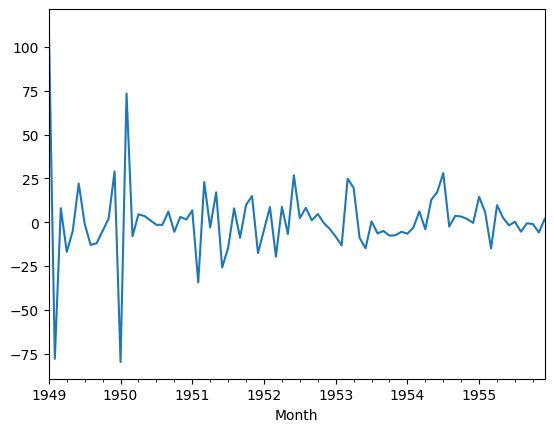

In [410]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

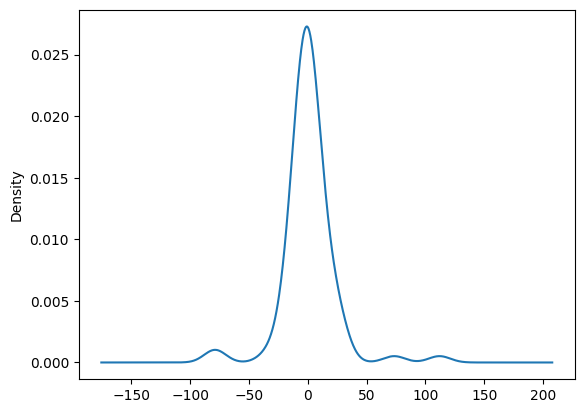

In [411]:
model_SARIMA_fit.resid.plot(kind='kde')

In [412]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-412-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [413]:
test_data.head(2)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,286.353610,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,281.367623,NaN


<Axes: xlabel='Month'>

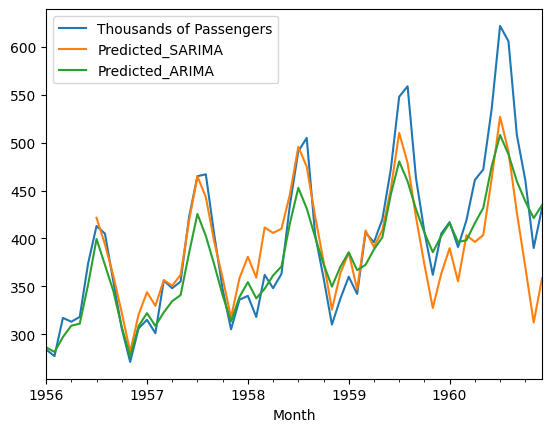

In [414]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

<Axes: xlabel='Month'>

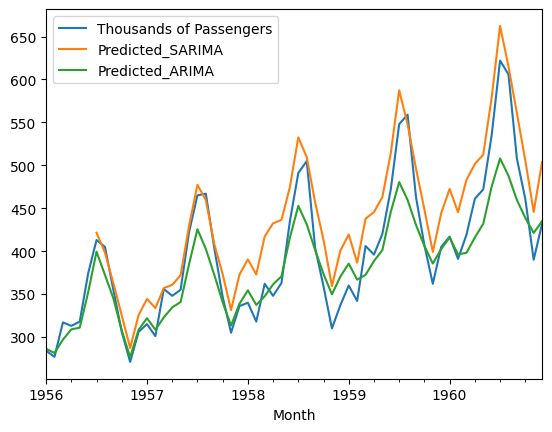

In [ ]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [ ]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
